# Import libraries and modules.

In [1]:
# DataFrame
import pandas as pd

# Matplot
import matplotlib.pyplot as plt
%matplotlib inline

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer
# Summary
from sklearn import datasets

from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# from sklearn.preprocessing import Imputer
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline

from scipy.stats import randint

# tensor-Keras
import tensorflow as tf 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from tensorflow.keras import utils
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# nltk
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer

# Word2vec
import gensim

# Utility
import re
import numpy as np
import os
from collections import Counter
import logging
import time
import pickle
import itertools



import warnings
import scipy.io
print("TensorFlow version: ", tf.__version__)

warnings.filterwarnings('ignore')

TensorFlow version:  2.2.0


# load Data

In [2]:
# import data 
tweets_train= pd.read_table('C:/Users/rzouga/Downloads/Github/NLP/train_tweets.txt', '\t',header=None)
tweets_train = tweets_train[0].str.split(",", n = 1, expand = True) 
tweets_train.columns = ["sentiment", "tweets"]
tweets_test =pd.read_table('C:/Users/rzouga/Downloads/Github/NLP/test_tweets.txt', '\t',header=None)
tweets_test = tweets_test[0].str.split(",", n = 1, expand = True) 
tweets_test.columns = ["sentiment", "tweets"]
# Print the head of df
tweets_train.head(3)

,sentiment,tweets
0,positive,Gas by my house hit $3.39!!!! I'm going to Ch...
1,negative,"Theo Walcott is still shit, watch Rafa and Jo..."
2,negative,"its not that I'm a GSP fan, i just hate Nick ..."


# Clean Data

In [3]:
tweets_train.dropna()
tweets_train.drop_duplicates()
tweets_test.dropna()
tweets_test.drop_duplicates()

,sentiment,tweets
0,neutral,"Won the match #getin . Plus, tomorrow is a ve..."
1,neutral,Did y'all hear what Tony Romo dressed up as f...
2,positive,Lunch from my new Lil spot ...THE COTTON BOWL...
3,positive,SNC Halloween Pr. Pumped. Let's work it for S...
4,neutral,Manchester United will try to return to winni...
...,...,...
1039,neutral,#WEB YouTube improves upload process with opt...
1040,positive,Gonna change my Tumblr theme. I hope I can fi...
1041,neutral,I'm so jealous of everyone at the Justin Bieb...
1042,neutral,"Jim Harbaugh, Alex Smith Drive Giants World S..."


# Text Processing

In [4]:
import re                                  # library for regular expression operations
import string                              # for string operations
from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings
# Spacy preporcessing 
#Stop words
#importing stop words from English language.
import spacy
import string
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
import re 

# Create our list of punctuation marks
punctuations = string.punctuation

# Create our list of stopwords
nlp = spacy.load('en')
stop_words = spacy.lang.en.stop_words.STOP_WORDS

# Load English tokenizer, tagger, parser, NER and word vectors
parser = English()

# Creating our tokenizer function
def spacy_tokenizer_cleaner(sentence):
    cleanr = re.compile('<.*?>')
    sentence = re.sub(cleanr, '', sentence)
    # Normalize text
    sentence = re.sub(r"[^a-zA-Z0-9]", " ", sentence.lower())
    # Remove urls
    sentence = re.sub(r"http\S+|www\S+|https\S+", '', sentence, flags=re.MULTILINE)
    # Remove user @ references 
    sentence = re.sub(r'\@\w+','', sentence)
    # remove old style retweet text "RT"
    sentence= re.sub(r'^RT[\s]+', '', sentence)

    # remove hyperlinks
    sentence = re.sub(r'https?:\/\/.*[\r\n]*', '', sentence)

    # remove hashtags
    # only removing the hash # sign from the word
    sentence= re.sub(r'#', '',sentence)
    # Creating our token object, which is used to create documents with linguistic annotations.
    
    mytokens = parser(sentence)

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return ' '.join(mytokens)


# Clean our tweetes

In [5]:
tweets_train['tweets_cleaned'] = tweets_train.tweets.apply(spacy_tokenizer_cleaner)
tweets_test['tweets_cleaned'] = tweets_test.tweets.apply(spacy_tokenizer_cleaner)


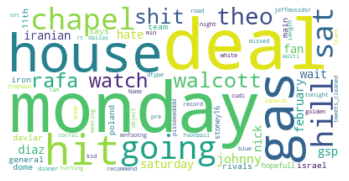

In [6]:
# Import the word cloud function  
 
from wordcloud import WordCloud, STOPWORDS
# Create and generate a word cloud image 
my_cloud =  WordCloud(background_color='white', stopwords=STOPWORDS).generate(str(tweets_train['tweets_cleaned']))

# Display the generated wordcloud image
plt.imshow(my_cloud, interpolation='bilinear') 
plt.axis("off")
# Don't forget to show the final image
plt.show()

In [7]:
tweets_train.head(5)

,sentiment,tweets,tweets_cleaned
0,positive,Gas by my house hit $3.39!!!! I'm going to Ch...,gas house hit 3 39 m going chapel hill sat
1,negative,"Theo Walcott is still shit, watch Rafa and Jo...",theo walcott shit watch rafa johnny deal saturday
2,negative,"its not that I'm a GSP fan, i just hate Nick ...",m gsp fan hate nick diaz t wait february
3,negative,Iranian general says Israel's Iron Dome can't...,iranian general says israel s iron dome t deal...
4,positive,with J Davlar 11th. Main rivals are team Pola...,j davlar 11th main rivals team poland hopefull...


# I/ ML_continued :RandomForest,XGBST
**XGBoost (eXtreme Gradient Boosting)** is an advanced implementation of gradient boosting algorithm. What differentiates it from other boosting algorithms is its speed and accuracy Extreme Gradient Boosting (XGBoost) is a more efficient version of gradient boosting framework containing both a linear model solver and tree learning algorithms.

In [8]:
from sklearn.preprocessing import OneHotEncoder
X_train= tweets_train['tweets_cleaned']# the features we want to analyze
X_test=tweets_test['tweets_cleaned']
y_train=tweets_train['sentiment']
y_test =tweets_test['sentiment']

#### Create the encoder.
encoder = LabelEncoder()

encoder.fit(y_train)   # Assume for simplicity all features are categorical.

y_train_le = encoder.transform(y_train)
y_test_le = encoder.transform(y_test)
y_train_oh =tf.keras.utils.to_categorical(y_train_le)
y_test_oh = tf.keras.utils.to_categorical(y_test_le)
print("y_train_le",y_train_le.shape)
print("y_test_le",y_test_le.shape)
print("y_train_oh",y_train_oh.shape)
print("y_test_oh",y_test_oh.shape)
print(encoder.classes_)

y_train_le (6588,)
y_test_le (1044,)
y_train_oh (6588, 3)
y_test_oh (1044, 3)
['negative' 'neutral' 'positive']


In [9]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer,ENGLISH_STOP_WORDS
import xgboost

#len_train = [len(x) for x in X_train]
#len_test = [len(x) for x in X_test]
#dig_train = [sum(char.isnumeric() for char in x) for x in X_train]
#dig_test = [sum(char.isnumeric() for char in x) for x in X_test]
    
# Not alpha numeric:
#nan_train = X_train.str.count('\W')
#nan_test = X_test.str.count('\W')
# tokenizer = spacy_tokenizer
vectorizer = CountVectorizer(ngram_range=(1, 2),max_features=500).fit(X_train)
X_train_cv =vectorizer.transform(X_train)
X_test_cv =vectorizer.transform(X_test)

def add_feature(X, feature_to_add):
    """
    Returns sparse feature matrix with added feature.
    feature_to_add can also be a list of features.
    """
    from scipy.sparse import csr_matrix, hstack
    return hstack([X, csr_matrix(feature_to_add).T], 'csr')
#X_train_cv = add_feature(X_train_cv, [len_train, dig_train, nan_train])
#X_test_cv = add_feature(X_test_cv, [len_test, dig_test, nan_test])


import xgboost as xgb
# Transform data into a matrix so that we can use XGBoost


# Fit XGBoost

XGBClassifier = xgboost.XGBClassifier(objective ='multi:softmax',
    eval_metric ='mlogloss',
    eta = 0.1,
    max_depth =10,
    num_class =3,
    estimators = 200)
XGBClassifier.fit(X_train_cv, y_train_le)

predicted1=XGBClassifier.predict(X_test_cv)


report = classification_report(y_test_le, predicted1,target_names=encoder.classes_)
print(X_train_cv.shape)
print(report)

(6588, 500)
              precision    recall  f1-score   support

    negative       0.54      0.15      0.23       193
     neutral       0.57      0.88      0.69       466
    positive       0.75      0.52      0.61       385

    accuracy                           0.61      1044
   macro avg       0.62      0.52      0.51      1044
weighted avg       0.63      0.61      0.58      1044



In [10]:
# Model Accuracy
print(" Accuracy_XGBST_CV:",metrics.accuracy_score(y_test_le, predicted1))

 Accuracy_XGBST_CV: 0.6120689655172413


# TF_IDF

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.svm import SVC
#len_train = [len(x) for x in X_train]
#len_test = [len(x) for x in X_test]
#dig_train = [sum(char.isnumeric() for char in x) for x in X_train]
#dig_test = [sum(char.isnumeric() for char in x) for x in X_test]
    
# Not alpha numeric:
#nan_train = X_train.str.count('\W')
#nan_test = X_test.str.count('\W')
tfidf = TfidfVectorizer( max_features=1500).fit(X_train)
X_train_tf = tfidf.transform(X_train)
X_test_tf = tfidf.transform(X_test)
#X_train_tf = add_feature(X_train_cv, [len_train, dig_train, nan_train])
#X_test_tf = add_feature(X_test_cv, [len_test, dig_test, nan_test])

XGBClassifier = xgboost.XGBClassifier(objective ='multi:softmax',
    eval_metric ='mlogloss',
    eta = 0.1,
    max_depth =16,
    num_class =3,
    estimators = 200)
XGBClassifier.fit(X_train_tf, y_train_le)

predicted2=XGBClassifier.predict(X_test_tf)


report = classification_report(y_test_le, predicted2,target_names=encoder.classes_)
print(X_train_tf.shape)
print(report)

(6588, 1500)
              precision    recall  f1-score   support

    negative       0.59      0.18      0.28       193
     neutral       0.59      0.89      0.71       466
    positive       0.76      0.55      0.64       385

    accuracy                           0.63      1044
   macro avg       0.65      0.54      0.54      1044
weighted avg       0.65      0.63      0.60      1044



In [12]:
# Model Accuracy
print(" Accuracy_XGBST_tf:",metrics.accuracy_score(y_test_le, predicted2))

 Accuracy_XGBST_tf: 0.632183908045977


In [13]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.svm import SVC
#len_train = [len(x) for x in X_train]
#len_test = [len(x) for x in X_test]
#dig_train = [sum(char.isnumeric() for char in x) for x in X_train]
#dig_test = [sum(char.isnumeric() for char in x) for x in X_test]
    
# Not alpha numeric:
#nan_train = X_train.str.count('\W')
#nan_test = X_test.str.count('\W')
tfidf = TfidfVectorizer( max_features=1500).fit(X_train)
X_train_tf = tfidf.transform(X_train)
X_test_tf = tfidf.transform(X_test)
#X_train_tf = add_feature(X_train_cv, [len_train, dig_train, nan_train])
#X_test_tf = add_feature(X_test_cv, [len_test, dig_test, nan_test])
rfc_b = RFC()
rfc_b.fit(X_train_tf,y_train_le)
predicted3 = rfc_b.predict(X_test_tf)
report = classification_report(y_test_le, predicted3,target_names=encoder.classes_)
print(X_train_tf.shape)
print(report)

(6588, 1500)
              precision    recall  f1-score   support

    negative       0.56      0.23      0.33       193
     neutral       0.61      0.85      0.71       466
    positive       0.72      0.58      0.65       385

    accuracy                           0.64      1044
   macro avg       0.63      0.55      0.56      1044
weighted avg       0.64      0.64      0.61      1044



In [14]:
# Model Accuracy
print(" Accuracy_RandomForestClassifier_tf:",metrics.accuracy_score(y_test_le, predicted3))

 Accuracy_RandomForestClassifier_tf: 0.6360153256704981


# II/ Deep Learning-Based Approaches 

In [15]:
from numpy import array
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.layers import Flatten
from numpy import array
import tensorflow as tf

from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
layers = tf.keras.layers
# Import relevant classes/functions
from tensorflow.keras.preprocessing.text import  Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Transform the list of sentences into a list of words
all_words = ' '.join(tweets_train['tweets_cleaned']).split(' ')
#all_words=[w for w in DOC ]
# Get number of unique words
vocab_size = len(set(all_words))
print(vocab_size)

17873


# Preporcess

## 1-Train data

In [16]:
#embeded sentences 
from tensorflow.keras.preprocessing.text import Tokenizer

word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(X_train)
vocab_length = len(word_tokenizer.word_index) + 1
# Prepare the data
embedded_train_data = word_tokenizer.texts_to_sequences(X_train)
#padded sentences 
from nltk.tokenize import word_tokenize
word_count = lambda sentence: len(word_tokenize(sentence))
longest_sentence = max(X_train, key=word_count)
length_long_sentence = len(word_tokenize(longest_sentence))
padded_train_data= pad_sequences(embedded_train_data, length_long_sentence, padding='post')
# Prepare the labels

# Create the encoder.
encoder = LabelEncoder()

encoder.fit(y_train)   

y_train_le = encoder.transform(y_train)
y_test_le = encoder.transform(y_test)
y_train_oh =tf.keras.utils.to_categorical(y_train_le)
y_test_oh = tf.keras.utils.to_categorical(y_test_le)

train_labels=y_train_oh 
#prep_labels = tf.keras.utils.to_categorical(tweets.sentiment)
print(padded_train_data[0],train_labels[0])
# Print the shapes
print(str(vocab_length))
print(str(length_long_sentence))
print(padded_train_data.shape)
print(train_labels.shape)

[2275  116  257   26 2621    4   12 1993 1084   60    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0] [0. 0. 1.]
17873
42
(6588, 42)
(6588, 3)


## 2-Test Data

In [17]:
#embeded sentences 
from tensorflow.keras.preprocessing.text import Tokenizer
# Prepare the data
embedded_test_data = word_tokenizer.texts_to_sequences(X_test)
#padded sentences 

padded_test_data= pad_sequences(embedded_test_data, length_long_sentence, padding='post')
# Prepare the labels
test_labels=y_test_oh  
#prep_labels = tf.keras.utils.to_categorical(tweets.sentiment)
print(padded_test_data[0],test_labels[0])
# Print the shapes


print(padded_test_data.shape)
print(test_labels.shape)

[  139   207   866     3  1005     6 17502     6     2  3703  3703     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0] [0. 1. 0.]
(1044, 42)
(1044, 3)


In [18]:
# custumise our embeded  matrix or import GLOVE that accelearate the training process 
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('C:/Users/rzouga/Desktop/cv-fr-en/CV+diplome/jobopr/glove.6B/glove.6B.300d.txt', encoding="utf8")
for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
 # embeddings_dictionary now contains words and corresponding GloVe embeddings for all the words.   

glove_file.close()

## 3-Train_Test_Split

In [19]:
X_train_dl= padded_train_data # the features we want to analyze
X_test_dl=padded_test_data
y_train_dl=train_labels
y_test_dl =test_labels
print(X_train_dl.shape , X_test_dl.shape)
print(y_train_dl.shape,y_test_dl.shape)

(6588, 42) (1044, 42)
(6588, 3) (1044, 3)


# Transfer learing 
Transfer learning provides a initial knowledge of the meaning of the words, and you can see that the model that used pre-trained embeddings started with higher accuracy. Of course, the model without transfer learning is learning directly from the corpus and is more specialized on the vocabulary present in the corpus, while the word embeddings used from transfer learning are more generic. By training the embeddings directly on the corpus, the model can be even better than the one initialized with the weights from transfer learning, but in many cases the computer power to train embeddings in a very big dataset is prohibitive.

The pre-trained vectors used were the GloVE with 300 dimension

In [20]:
embedding_matrix = zeros((vocab_length, 300))
for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector
#embedding_matrix now contains pretrained word embeddings for the words in our corpus.

# Modeling 
## 1-Simple RNN 

In [21]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Multiply, Add, LSTM, LeakyReLU
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [22]:
# Build and compile the model
wordvec_dim=300
model_RNN = tf.keras.Sequential(name='model_RNN')
model_RNN.add(layers.Embedding(vocab_length, output_dim=wordvec_dim, weights=[embedding_matrix], input_length=length_long_sentence, trainable=False))
model_RNN.add(LSTM(128, return_sequences=True, dropout=0.1, recurrent_dropout=0.1))
model_RNN.add(LSTM(128, return_sequences=False, dropout=0.1, recurrent_dropout=0.1))
model_RNN.add(Dense(16))
model_RNN.add(Dropout(rate=0.2))
model_RNN.add(Dense(3, activation='softmax'))
model_RNN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

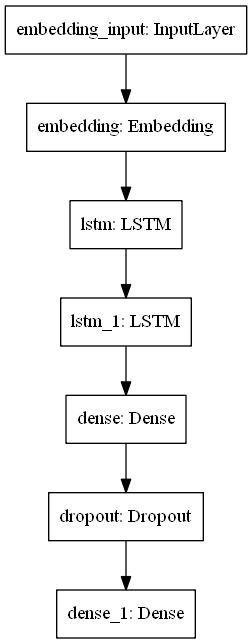

In [23]:
# plot graph
import graphviz
import pydot
import os     
os.environ["PATH"] += os.pathsep + 'C:/Users/rzouga/Anaconda3/Library/bin/graphviz'
tf.keras.utils.plot_model(model_RNN, to_file='multilayer_perceptron_graph.png')

In [24]:
print(model_RNN.summary())

Model: "model_RNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 42, 300)           5361900   
_________________________________________________________________
lstm (LSTM)                  (None, 42, 128)           219648    
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense (Dense)                (None, 16)                2064      
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 51        
Total params: 5,715,247
Trainable params: 353,347
Non-trainable params: 5,361,900
_________________________________________

# Fit the Model
**min_delta** : minimum change in the monitored quantity to qualify as an improvement, i.e. an absolute change of less than min_delta, will count as no improvement.

**patience** : number of epochs with no improvement after which training will be stopped.


In [25]:
# configure early stopping
es = EarlyStopping(monitor='loss',min_delta=0.00000000000000001, patience=10)
history_model_RNN =model_RNN.fit(X_train_dl, y_train_dl, batch_size=64, epochs=1000, verbose=0,callbacks=[es],validation_split=0.05)

Accuracy_RNN_model: 64.750957
loss_RNN_model: 246.974587


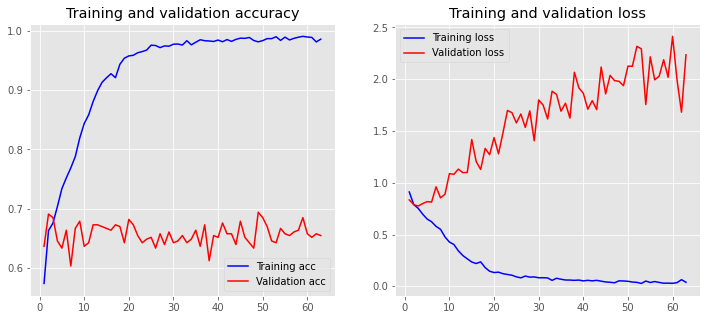

In [26]:
loss_RNN, accuracy_RNN = model_RNN.evaluate( X_test_dl, y_test_dl, verbose=0)
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
plot_history(history_model_RNN)
print('Accuracy_RNN_model: %f' % (accuracy_RNN*100))
print('loss_RNN_model: %f' % (loss_RNN*100))

In [27]:
model_RNN.save('C:/Users/rzouga/Downloads/Github/NLP/my_model_RNN_tweet.h5') 

# 2-Hybrid CNN-LSTM:

Convolutional neural networks have been found to work well with text data ,the CNN Model for feature extraction 

LSTM Model for interpreting the features across time steps.

In [28]:
#Convolutional neural networks have been found to work well with text data ,the CNN Model for feature extraction 
#LSTM Model for interpreting the features across time steps.
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Multiply, Add, LSTM, LeakyReLU
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
wordvec_dim=300
model_CNN_LSTM = tf.keras.Sequential(name='model_CNN_LSTM')
model_CNN_LSTM.add(layers.Embedding(vocab_length, output_dim=wordvec_dim, weights=[embedding_matrix], input_length=length_long_sentence, trainable=False))
model_CNN_LSTM.add(layers.Conv1D(200, 7, activation='relu',padding='same'))
model_CNN_LSTM.add(layers.MaxPooling1D(pool_size=4))
model_CNN_LSTM.add(LSTM(128, return_sequences=True, dropout=0.1, recurrent_dropout=0.1))
model_CNN_LSTM.add(LSTM(128, return_sequences=False, dropout=0.1, recurrent_dropout=0.1))
model_CNN_LSTM.add(Dense(16))
model_CNN_LSTM.add(Dropout(rate=0.2))
model_CNN_LSTM.add(Dense(3, activation='softmax'))
model_CNN_LSTM.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_CNN_LSTM.summary())

Model: "model_CNN_LSTM"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 42, 300)           5361900   
_________________________________________________________________
conv1d (Conv1D)              (None, 42, 200)           420200    
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 10, 200)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 10, 128)           168448    
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                2064      
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)             

In [29]:
# configure early stopping
es = EarlyStopping(monitor='loss',min_delta=0.00000000000000001, patience=10)
history_model_CNN_LSTM =model_CNN_LSTM.fit(X_train_dl, y_train_dl, batch_size=64, epochs=1000, verbose=0,callbacks=[es],validation_split=0.05)

Accuracy_CNN_LSTM_model: 61.590040
loss_CNN_LSTM_model: 238.649058


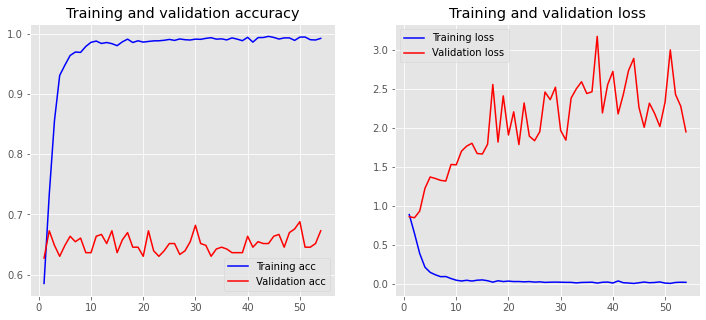

In [32]:
loss_CNN_LSTM, accuracy_CNN_LSTM = model_CNN_LSTM.evaluate( X_test_dl, y_test_dl, verbose=0)
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
plot_history(history_model_CNN_LSTM )
print('Accuracy_CNN_LSTM_model: %f' % (accuracy_CNN_LSTM *100))
print('loss_CNN_LSTM_model: %f' % (loss_CNN_LSTM *100))

In [31]:
model_CNN_LSTM .save('C:/Users/rzouga/Downloads/Github/NLP/my_model_CNN_LSTM _tweet.h5') 